Link: https://unstats.un.org/sdgs/dataportal/analytics/DataAvailability

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
#Importing data set 
sdg_goal = pd.read_csv('SDG.csv')

### Data Handling

In [3]:
#Displaying number of rows and columns
sdg_goal.shape

(249, 19)

In [4]:
#Looking at the data set information
sdg_goal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GeoAreaCode  249 non-null    int64 
 1   GeoAreaName  249 non-null    object
 2   Goal 1       249 non-null    object
 3   Goal 2       249 non-null    object
 4   Goal 3       249 non-null    object
 5   Goal 4       249 non-null    object
 6   Goal 5       249 non-null    object
 7   Goal 6       249 non-null    object
 8   Goal 7       249 non-null    object
 9   Goal 8       249 non-null    object
 10  Goal 9       249 non-null    object
 11  Goal 10      249 non-null    object
 12  Goal 11      249 non-null    object
 13  Goal 12      249 non-null    object
 14  Goal 13      249 non-null    object
 15  Goal 14      249 non-null    object
 16  Goal 15      249 non-null    object
 17  Goal 16      249 non-null    object
 18  Goal 17      249 non-null    object
dtypes: int64(1), object(18)
memor

In [5]:
#Changing columns with percentage that were 'object' type to 'float' type so we can work with it

percentage_columns = sdg_goal.columns[2:20]

for col in percentage_columns:
    sdg_goal[col] = sdg_goal[col].str.replace('%', '').astype(float)


In [6]:
#Checking the data type of each column
sdg_goal.dtypes

GeoAreaCode      int64
GeoAreaName     object
Goal 1         float64
Goal 2         float64
Goal 3         float64
Goal 4         float64
Goal 5         float64
Goal 6         float64
Goal 7         float64
Goal 8         float64
Goal 9         float64
Goal 10        float64
Goal 11        float64
Goal 12        float64
Goal 13        float64
Goal 14        float64
Goal 15        float64
Goal 16        float64
Goal 17        float64
dtype: object

In [7]:
#Displaying the first 5 rows and all the columns of the updated dat frame
sdg_goal.head()

,GeoAreaCode,GeoAreaName,Goal 1,Goal 2,Goal 3,Goal 4,Goal 5,Goal 6,Goal 7,Goal 8,Goal 9,Goal 10,Goal 11,Goal 12,Goal 13,Goal 14,Goal 15,Goal 16,Goal 17
0,4,Afghanistan,28.10,51.67,70.90,32.05,6.94,73.13,100.0,52.08,50.00,35.83,30.34,26.36,11.56,0.00,49.76,18.75,69.07
1,248,Åland Islands,0.00,4.17,0.00,0.00,0.00,7.14,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.39,0.00,2.08
2,8,Albania,46.90,49.58,65.06,68.52,30.56,75.83,80.0,46.88,66.07,52.31,25.86,30.91,6.00,35.38,45.71,15.30,61.35
3,12,Algeria,35.71,50.83,68.59,39.14,4.17,66.35,100.0,51.04,60.94,44.40,37.50,35.91,16.67,16.15,59.05,21.39,64.26
4,16,American Samoa,7.14,0.00,5.38,0.00,0.00,29.90,40.0,0.00,5.73,10.00,5.56,9.09,0.00,11.54,34.58,2.08,10.93


In [8]:
#Cheking for missing values

sdg_goal.isnull().sum()

GeoAreaCode    0
GeoAreaName    0
Goal 1         0
Goal 2         0
Goal 3         0
Goal 4         0
Goal 5         0
Goal 6         0
Goal 7         0
Goal 8         0
Goal 9         0
Goal 10        0
Goal 11        0
Goal 12        0
Goal 13        0
Goal 14        0
Goal 15        0
Goal 16        0
Goal 17        0
dtype: int64

In [9]:
# Create a copy with only country name and code for reference later
country_code_data = sdg_goal[['GeoAreaName', 'GeoAreaCode']].copy()

print(country_code_data.head())


      GeoAreaName  GeoAreaCode
0     Afghanistan            4
1   Åland Islands          248
2         Albania            8
3         Algeria           12
4  American Samoa           16


In [10]:
#Dropping categorical data to create the models
sdg_goal = sdg_goal.drop('GeoAreaName', axis=1)


In [11]:
#Updated data frame
sdg_goal.head()

,GeoAreaCode,Goal 1,Goal 2,Goal 3,Goal 4,Goal 5,Goal 6,Goal 7,Goal 8,Goal 9,Goal 10,Goal 11,Goal 12,Goal 13,Goal 14,Goal 15,Goal 16,Goal 17
0,4,28.10,51.67,70.90,32.05,6.94,73.13,100.0,52.08,50.00,35.83,30.34,26.36,11.56,0.00,49.76,18.75,69.07
1,248,0.00,4.17,0.00,0.00,0.00,7.14,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.39,0.00,2.08
2,8,46.90,49.58,65.06,68.52,30.56,75.83,80.0,46.88,66.07,52.31,25.86,30.91,6.00,35.38,45.71,15.30,61.35
3,12,35.71,50.83,68.59,39.14,4.17,66.35,100.0,51.04,60.94,44.40,37.50,35.91,16.67,16.15,59.05,21.39,64.26
4,16,7.14,0.00,5.38,0.00,0.00,29.90,40.0,0.00,5.73,10.00,5.56,9.09,0.00,11.54,34.58,2.08,10.93


### Histogram for Goal 17

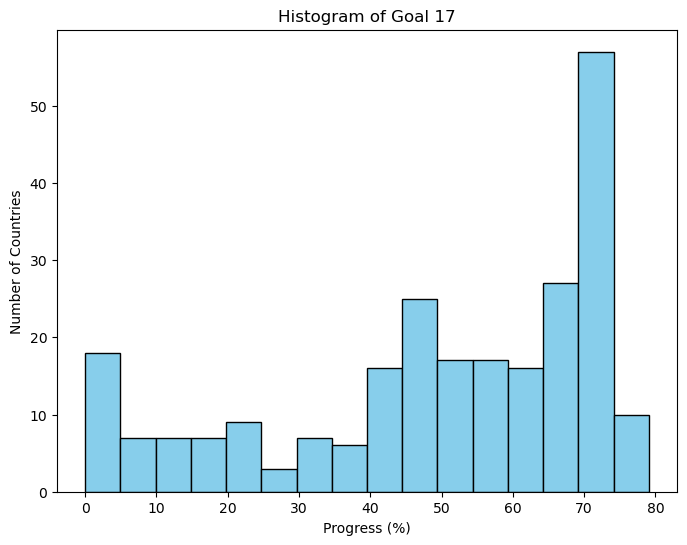

In [12]:
#Creating a histogram for Goal 17 to visualize the distribution of the data
plt.figure(figsize=(8, 6))  
plt.hist(sdg_goal['Goal 17'], bins=16, color='skyblue', edgecolor='black')  
plt.xlabel('Progress (%)')
plt.ylabel('Number of Countries')
plt.title(f'Histogram of Goal 17')
plt.show()

# Data Visualization

### Correlation Matrix Heatmap

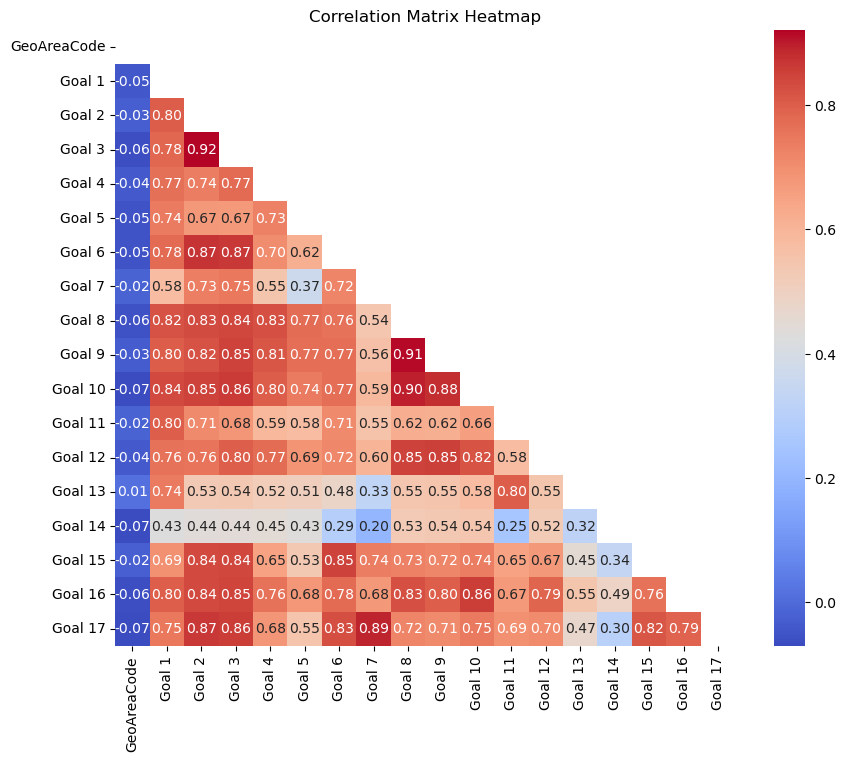

In [13]:
#Correlation matrix displaying coefficients between al the variables
corr_matrix = sdg_goal.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Distribution Plots

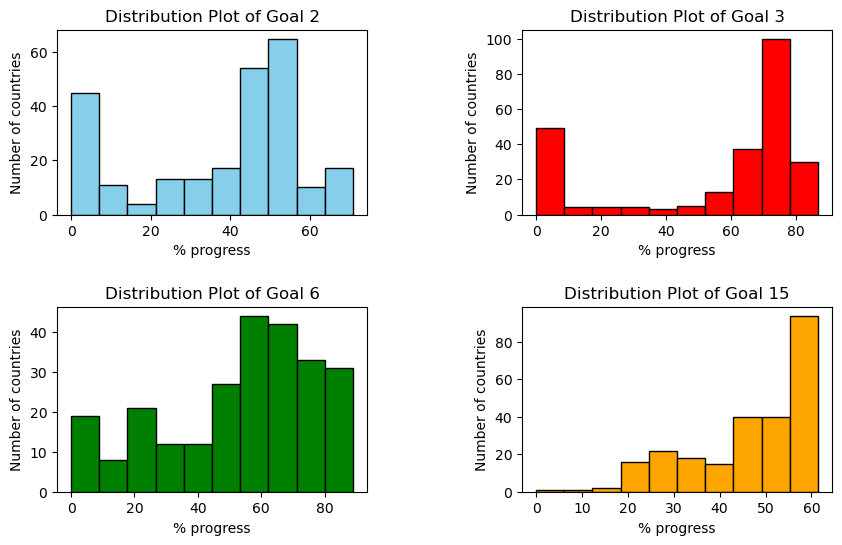

In [14]:
#Distribution plots for Goals 2, 3, 6 and 15
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows,ncols, figsize = (10,6))


#Distribution Plot of Goal 2
ax[0,0].hist(sdg_goal['Goal 2'], color='skyblue',  edgecolor = 'k')
ax[0,0].set_xlabel('% progress')
ax[0,0].set_ylabel('Number of countries')
ax[0,0].set_title(f'Distribution Plot of Goal 2')

#Distribution Plot of Goal 3
ax[0,1].hist(sdg_goal['Goal 3'], color='red',  edgecolor = 'k')
ax[0,1].set_xlabel('% progress')
ax[0,1].set_ylabel('Number of countries')
ax[0,1].set_title(f'Distribution Plot of Goal 3')

#Distribution Plot of Goal 6
ax[1,0].hist(sdg_goal['Goal 6'], color='green',  edgecolor = 'k')
ax[1,0].set_xlabel('% progress')
ax[1,0].set_ylabel('Number of countries')
ax[1,0].set_title(f'Distribution Plot of Goal 6')

#Distribution Plot of Goal 15
ax[1,1].hist(sdg_goal['Goal 15'], color='orange',  edgecolor = 'k')
ax[1,1].set_xlabel('% progress')
ax[1,1].set_ylabel('Number of countries')
ax[1,1].set_title(f'Distribution Plot of Goal 15')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Scatter Plots

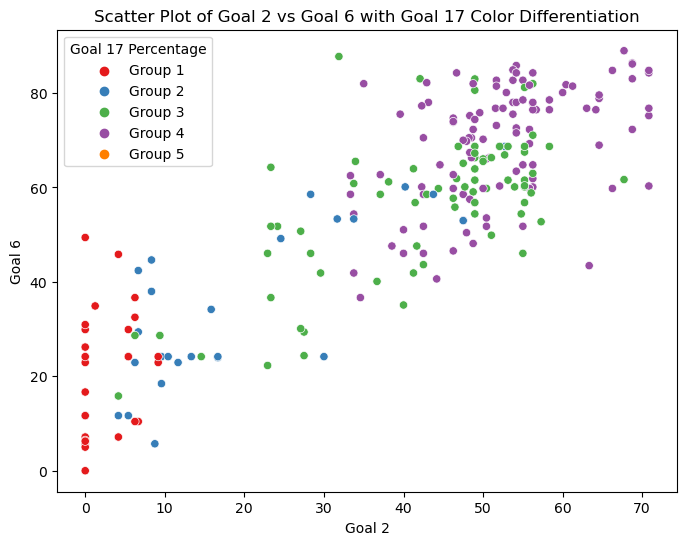

In [15]:
#Divide Goal 17 percentages into 5 subgroups
sdg_goal['Goal17_Group'] = pd.cut(sdg_goal['Goal 17'], bins=[0, 20, 40, 60, 80, 100],
                                  labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])

#Create a scatter plot with Goal 17 as color differentiation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Goal 2', y='Goal 6', hue='Goal17_Group', data=sdg_goal, palette='Set1')
plt.title('Scatter Plot of Goal 2 vs Goal 6 with Goal 17 Color Differentiation')
plt.xlabel('Goal 2')
plt.ylabel('Goal 6')
plt.legend(title='Goal 17 Percentage')
plt.show()

# Model Building

In [16]:
#Dropping the groups I created for Data Visualization
sdg_goal.drop(columns=['Goal17_Group'], inplace=True)


In [17]:
# Splitting the dataset into features (X) and target variable (y)
X = sdg_goal.drop('Goal 17', axis=1)  
y = sdg_goal['Goal 17']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression Model

In [18]:
# Initialize and train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)  

# Make predictions
predictions = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 49.204378401794884
R-squared (R²): 0.884640899283073


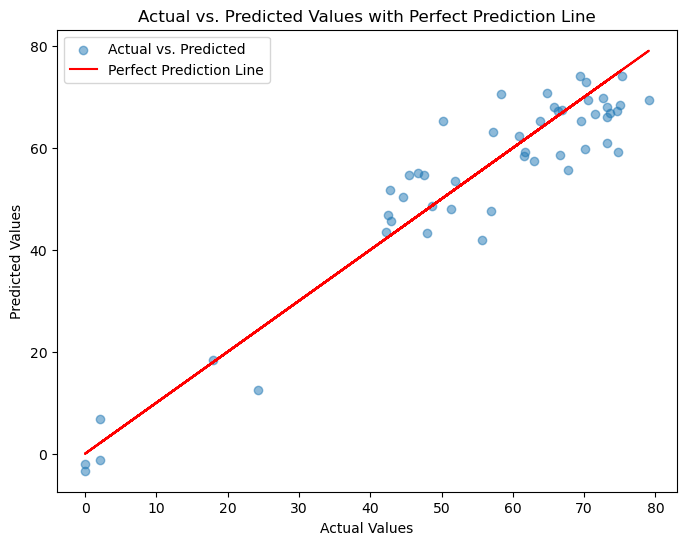

In [19]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Perfect Prediction Line')
plt.legend()
plt.show()

Coefficients (model interpretation)

In [20]:
if isinstance(reg_model, LinearRegression):
    coefficients = reg_model.coef_
    feature_names = X_train.columns
    
    for feature, coef in zip(feature_names, coefficients):
        print(f"{feature}: {coef}")


GeoAreaCode: -0.005069312107773889
Goal 1: 0.08745204233192021
Goal 2: 0.3147516192522357
Goal 3: 0.0162676910173183
Goal 4: 0.06584277199578405
Goal 5: 0.01289482463321818
Goal 6: -0.019752883686010015
Goal 7: 0.4007520153554902
Goal 8: 0.08000717998731827
Goal 9: -0.08282319493934676
Goal 10: 0.028227162693811713
Goal 11: 0.19615455472510054
Goal 12: 0.00702364434520628
Goal 13: -0.037132026818901244
Goal 14: -0.05361962703574052
Goal 15: -0.010950268872570688
Goal 16: 0.03791692891855648


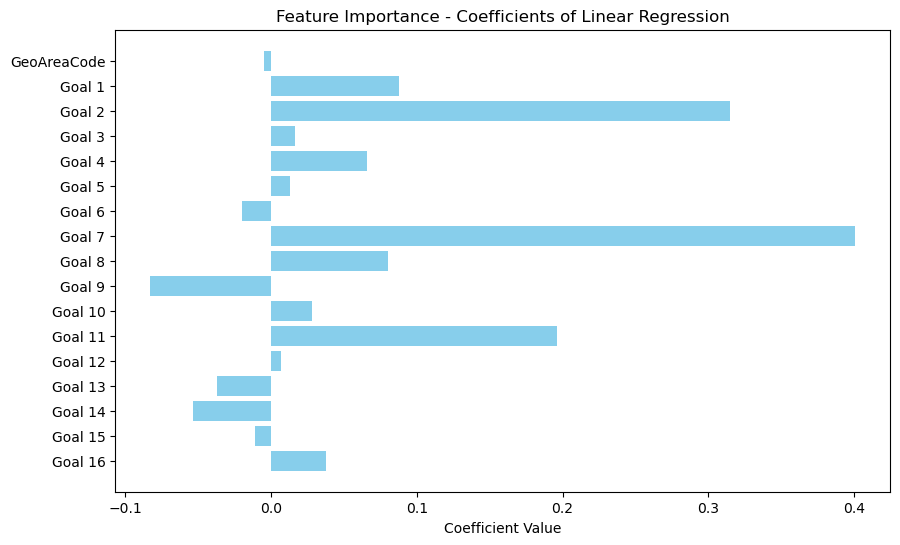

In [21]:
#Feature Importance plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Coefficients of Linear Regression')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


## Random Forest Analysis

Mean Squared Error (MSE): 35.738625445999965
R-squared (R²): 0.9162112026160817


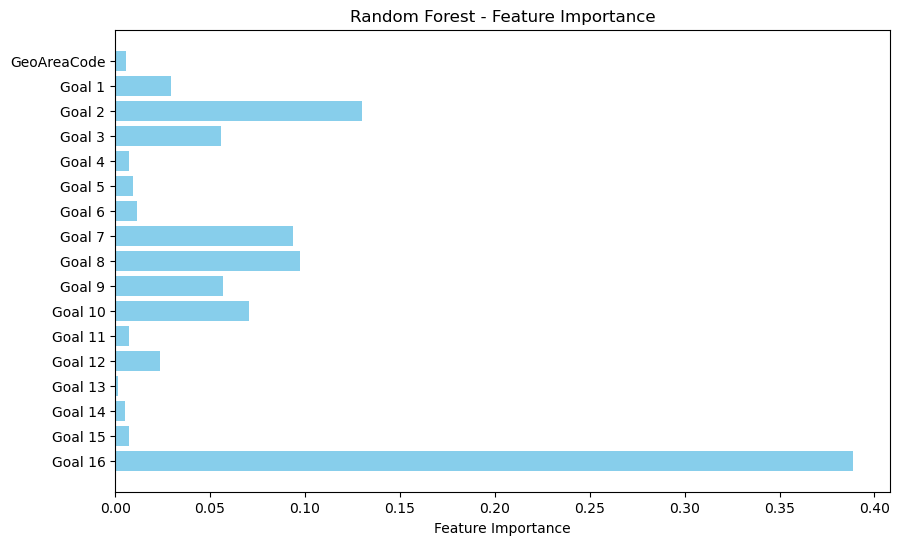

In [22]:
# Creating the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()  
plt.show()


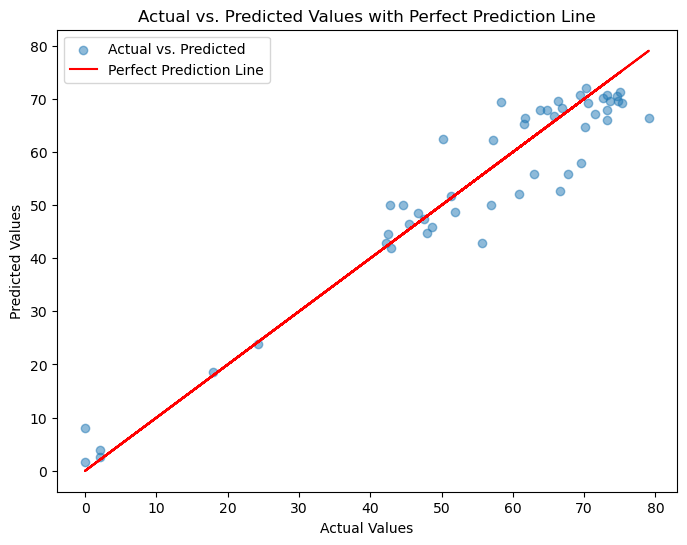

In [23]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Perfect Prediction Line')
plt.legend()
plt.show()

## Decision Tree Regressor Model

In [24]:
# Creating the Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Making predictions on the test set
predictions = tree_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 63.63433599999999
R-squared (R²): 0.8508100292267691


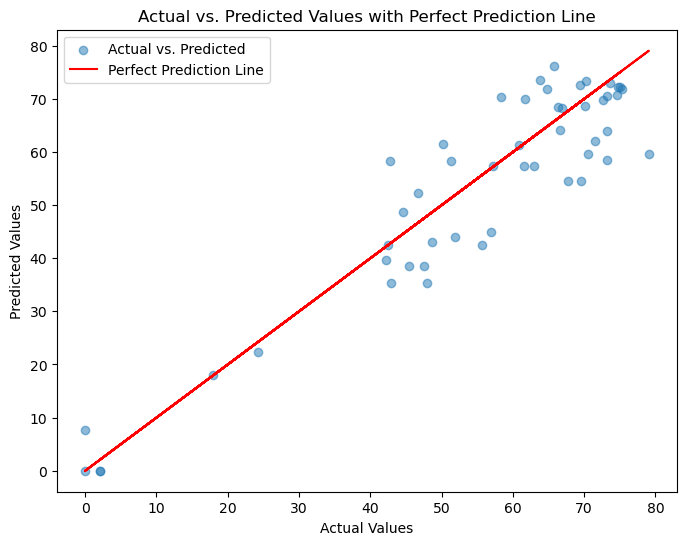

In [25]:
#Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Perfect Prediction Line')
plt.legend()
plt.show()